In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

plt.style.use('dark_background')

In [3]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling the missing data

In [6]:
train['Age'] = train['Age'].interpolate()
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
train['Embarked'] = train['Embarked'].fillna(method='ffill')
train['Embarked'].isnull().sum()

0

In [8]:
cols = ['Name','Ticket','Cabin']
train = train.drop(cols, axis=1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Let's Visualize them

In [11]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

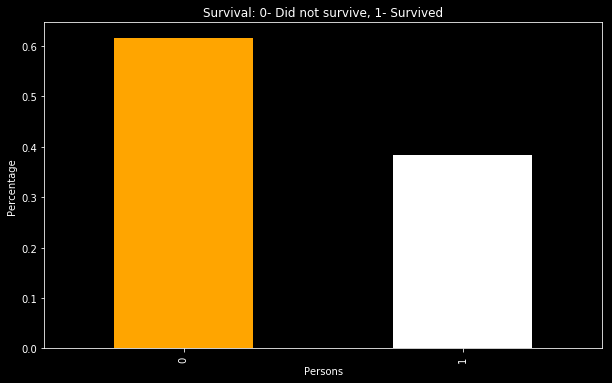

In [12]:
fig = plt.figure(figsize=(10, 6))
    
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=1.0, color=['orange', 'white'])
plt.title("Survival: 0- Did not survive, 1- Survived")
plt.xlabel("Persons")
plt.ylabel("Percentage");

male      577
female    314
Name: Sex, dtype: int64


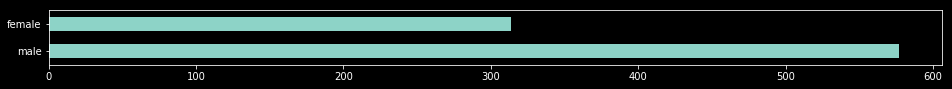

In [13]:
fig = plt.figure(figsize=(16, 1))
train['Sex'].value_counts().plot(kind = 'barh', edgecolor='None', alpha = 1.0)
print(train['Sex'].value_counts())

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
train['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

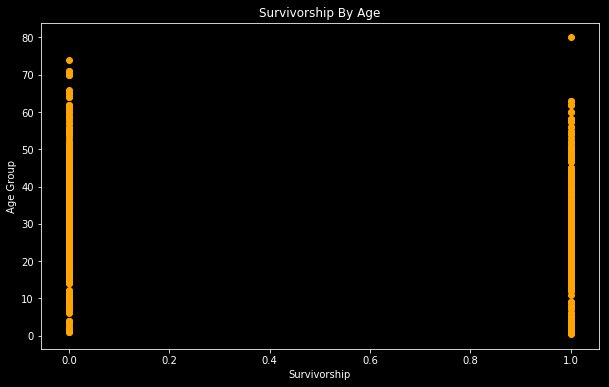

In [17]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(train['Survived'], train['Age'], alpha=1.0, color = 'orange')
plt.xlabel("Survivorship")
plt.ylabel("Age Group")
plt.title("Survivorship By Age");

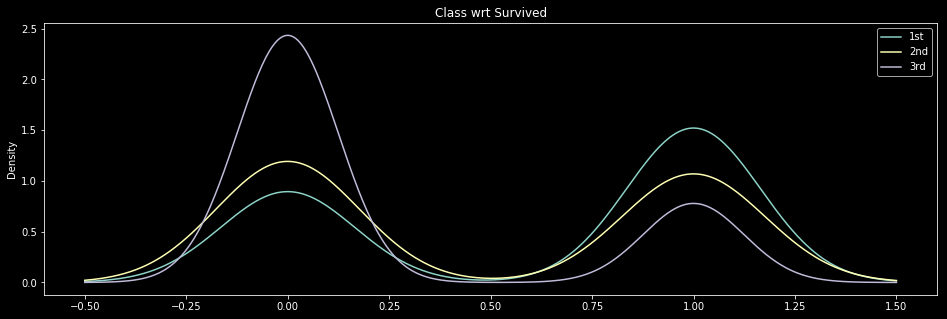

In [18]:
fig = plt.figure(figsize=(16, 5))
for x in [1, 2, 3]:
    train.Survived[train.Pclass == x].plot(kind = 'kde')
plt.title("Class wrt Survived")
plt.legend(("1st", "2nd", "3rd"))

from the graph:

              the 1st class (green) recorded the least death & the highest in survival.

              the 2nd class (yellow) recorded an avearage death & average in survival.

              the 3rd class (voilet) recorded the highest death & the least survival.

In [19]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
train.Embarked.value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

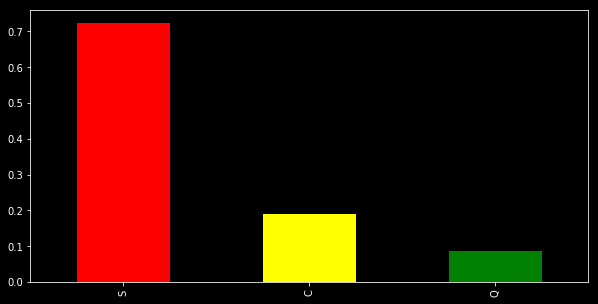

In [21]:
fig = plt.figure(figsize=(10, 5))
train.Embarked.value_counts(normalize=True).plot(kind='bar', color= ['red', 'yellow', 'green'])

              C = Cherbourg, Q = Queenstown, S = Southampton

# Let's Train Our Data

In [22]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
cols = ['Name','Ticket','Cabin']
test = test.drop(cols, axis=1)

test['Age'] = test['Age'].interpolate()

In [25]:
test['Fare'] = test['Fare'].interpolate()

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [27]:
X = train[['Age', 'Pclass', 'Fare', 'Parch']].values # Put them this way'[]' instead of '.' format to prevent "inconsistent numbers of samples" 
y = train['Survived'].values
# reference train csv
# X we can also plot us, X = train.iloc[:,5].values, train.iloc[:, 3] etc...
# y also as, y = train.iloc[:, 2] 

In [28]:
X.shape

(891, 4)

In [29]:
y.shape

(891,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
# Always remember to arrange X's on one side, and y's on another side to prevent Value_error : ?%

# Checking Various Algorithms

In [31]:
# Logistic Regression
# XGBoost
# Random Forest
# Decision Tree
# Support Vector Machines

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)
Acc_LogR = round(accuracy_score(y_pred, y_test) * 100, 2)
print(Acc_LogR)

73.54


In [34]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
Acc_XGB = round(accuracy_score(y_pred, y_test) * 100, 2)
print(Acc_XGB)

75.34


In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RFt = RandomForestClassifier()
RFt.fit(X_train, y_train)
y_pred = RFt.predict(X_test)
Acc_RFt = round(accuracy_score(y_pred, y_test) * 100, 2)
print(Acc_RFt)

72.65


In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, y_train)
y_pred = Dtree.predict(X_test)
Acc_Dtree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(Acc_Dtree)

65.47


In [37]:
# Support Vector Machines
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
Acc_SVM = round(accuracy_score(y_pred, y_test) * 100, 2)
print(Acc_SVM)

67.71


In [38]:
# Logistic Regression
# XGBoost
# Random Forest
# Decision Tree
# Support Vector Machines

In [39]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'Decision Tree', 'Support Vector Machines'],
    'Score': [Acc_LogR, Acc_XGB, Acc_RFt, Acc_Dtree, Acc_SVM]
                        })
models.sort_values(by='Score', ascending=False)

,Model,Score
1,XGBoost,75.34
0,Logistic Regression,73.54
2,Random Forest,72.65
4,Support Vector Machines,67.71
3,Decision Tree,65.47


In [40]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from xgboost import XGBClassifier

X = train[['Age', 'Pclass', 'Fare', 'Parch']].values
y = train["Survived"]

kfold = KFold(n_splits=4, random_state=22) # k=4
xyz=[]
accuracy=[]
std=[]

classifiers = ['Logistic Regression', 'XGBoost', 'Random Forest', 'Decision Tree', 'Support Vector Machines']
models = [LogisticRegression(), XGBClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), SVC()]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
New_Models_Dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers)       
New_Models_Dataframe 

,CV Mean,Std
Logistic Regression,0.703753,0.038900
XGBoost,0.722827,0.036884
Random Forest,0.648740,0.028781
Decision Tree,0.634070,0.029141
Support Vector Machines,0.624071,0.032318


Here, XGBoost give the most accurate outcome/result to our test set

In [41]:
# Creating our Submission File

#### We check if there's any missing data in both train & test csvs

In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [43]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [46]:
#set ids as PassengerId and predict survival 
my_test = test[['Age', 'Pclass', 'Fare', 'Parch']].values
ids = test['PassengerId']
predictions = XGB.predict(my_test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)
print("The submission was successfully saved!")

The submission was successfully saved!
